# <center> Phase 02: Exploring data & preprocess


# Import các thư viện cần thiết


In [42]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# TIỀN XỬ LÝ DỮ LIỆU TỪ FILE understat.com.csv


Đây là dữ liệu tổng hợp các chỉ số thống kê của các đội bóng qua từng mùa giải trong một giải đấu cụ thể. Nó bao gồm các thông tin về hiệu suất của đội bóng như số trận đấu, số bàn thắng, bàn thua, điểm số thực tế, và các chỉ số kỳ vọng như xG (Expected Goals) hoặc xGA (Expected Goals Against).

Phạm vi dữ liệu: tổng hợp cả mùa giải

Thời gian mùa giải: 2014 - 2019

Số lượng mùa giải: 6 năm


## A. LÀM SẠCH DỮ LIỆU

### A.1. Khám phá dữ liệu

#### Đọc dữ liệu từ raw_data

Đầu tiên, ta đọc 'understat.com.csv' để lưu trữ vào biến raw_data_overview

In [43]:
raw_data_overview = pd.read_csv('data/understat.com.csv')
raw_data_overview

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,RFPL,2019,12,PFC Sochi,30,8,9,13,40,39,...,38.850259,-0.149741,32.780898,-0.096048,12.838079,10.562327,175,206,38.6587,5.6587
680,RFPL,2019,13,FK Akhmat,30,7,10,13,27,46,...,40.626196,-5.373804,38.363370,-10.495864,11.199502,10.806357,124,206,36.5424,5.5424
681,RFPL,2019,14,Krylya Sovetov Samara,30,8,7,15,33,40,...,42.980693,2.980693,37.550114,-7.777201,11.949903,10.080858,103,215,36.3363,5.3363
682,RFPL,2019,15,FC Tambov,30,9,4,17,37,41,...,39.747938,-1.252062,34.468003,-12.231948,14.666049,9.192768,150,270,29.2413,-1.7587


#### Dữ liệu có bao nhiêu hàng, bao nhiêu cột?


Tiếp theo, chúng ta tính toán số lượng dòng và cột và lưu vào biến 'num_cols_overview' và 'num_rows_overview'

In [44]:
num_rows_overview, num_cols_overview =raw_data_overview.shape
print(f'Số dòng: {num_rows_overview}')
print(f'Số cột: {num_cols_overview}')

Số dòng: 684
Số cột: 24


#### Ý nghĩa của các dòng dữ liệu




Mỗi dòng đại diện cho một đội bóng trong một mùa giải cụ thể của một giải đấu. Dữ liệu dòng bao gồm các thông tin về năm, tên đội, xếp hạng, số trận đã đấu, số trận thắng, hòa, thua, tổng số bàn thắng ghi được và số bàn thua phải nhận,...

#### Dữ liệu các dòng có bị lặp không?

Tiếp theo, tính toán số lượng dòng có lặp không và lưu vào biến 'duplicated_rows_overview'

In [45]:
duplicated_rows_overview = raw_data_overview[raw_data_overview.duplicated()]
if duplicated_rows_overview.empty:
    print("Không có dòng bị lặp trong dữ liệu.")
else:
    print("Có dòng bị lặp trong dữ liệu.")

Không có dòng bị lặp trong dữ liệu.


Như vậy, giữa mỗi dòng không có dự liệu nào bị lặp

#### Ý nghĩa của các cột dữ liệu

- league: Tên giải đấu (ví dụ: La Liga, Bundesliga).

- year: Năm diễn ra mùa giải.

- position: Vị trí xếp hạng cuối cùng của đội trong mùa giải.

- team: Tên đội bóng.

- matches: Số trận đấu đã chơi.

- wins: Số trận thắng.

- draws: Số trận hòa.

- loses: Số trận thua.

- scored: Tổng số bàn thắng ghi được.

- missed: Tổng số bàn thua.

- pts: Tổng điểm (thắng 3 điểm, hòa 1 điểm, thua 0 điểm).

- xG: Tổng số bàn thắng kỳ vọng (Expected Goals).

- xG_diff: Hiệu số bàn thắng kỳ vọng so với thực tế.

- npxG: Tổng số bàn thắng kỳ vọng không tính phạt đền (Non-Penalty Expected Goals).

- xGA: Tổng số bàn thua kỳ vọng (Expected Goals Against).

- xGA_diff: Hiệu số bàn thua kỳ vọng so với thực tế.

- npxGA: Tổng số bàn thua kỳ vọng không tính phạt đền.

- npxGD: Hiệu số bàn thắng kỳ vọng không tính phạt đền (npxG - npxGA).

- ppda_coef: Chỉ số PPDA (Passes Allowed Per Defensive Action) - đo lường cường độ pressing của đội.

- oppda_coef: Chỉ số pressing của đối thủ (Opponent PPDA).

- deep: Tổng số pha tấn công sâu (đưa bóng vào khu vực 20m gần khung thành đối phương).

- deep_allowed: Số pha tấn công sâu mà đội phải chống lại.

- xpts: Số điểm kỳ vọng dựa trên bàn thắng và bàn thua kỳ vọng.

- xpts_diff: Chênh lệch giữa số điểm kỳ vọng và số điểm thực tế.

#### Kiểu dữ liệu của từng cột

In [46]:
raw_data_overview.dtypes

league           object
year              int64
position          int64
team             object
matches           int64
wins              int64
draws             int64
loses             int64
scored            int64
missed            int64
pts               int64
xG              float64
xG_diff         float64
npxG            float64
xGA             float64
xGA_diff        float64
npxGA           float64
npxGD           float64
ppda_coef       float64
oppda_coef      float64
deep              int64
deep_allowed      int64
xpts            float64
xpts_diff       float64
dtype: object

#### Chuẩn hóa kiểu dữ liệu nếu chưa phù hợp

Nhận thấy rằng, 'Year' có kiểu dữ liệu số, tuy nhiên nó thể hiện thời gian thay vì một số. Do đó, ta sẽ chuyển đổi nó thành kiểu Object để thể hiện rõ ràng hơn

In [47]:
raw_data_overview['year'] = raw_data_overview['year'].astype('object')
raw_data_overview.dtypes

league           object
year             object
position          int64
team             object
matches           int64
wins              int64
draws             int64
loses             int64
scored            int64
missed            int64
pts               int64
xG              float64
xG_diff         float64
npxG            float64
xGA             float64
xGA_diff        float64
npxGA           float64
npxGD           float64
ppda_coef       float64
oppda_coef      float64
deep              int64
deep_allowed      int64
xpts            float64
xpts_diff       float64
dtype: object

#### Với các cột dữ liệu không phải dạng số, các giá trị được phân bổ như thế nào

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [48]:
def categorical_analysis(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(exclude=['number']).columns
    analysis_results = []

    for col in cat_cols:
        missing_ratio = round(df[col].isna().sum() / df.shape[0] * 100, 1)
        num_values = df[col].nunique()
        value_counts = df[col].value_counts(normalize=True)
        value_ratios = {val: round(perc * 100, 1) for val, perc in value_counts.items()}

        analysis_results.append({
            'column': col,
            'missing_ratio': missing_ratio,
            'num_values': num_values,
            'value_ratios': value_ratios,
        })

    return pd.DataFrame(analysis_results)

cat_col_info_overview = categorical_analysis(raw_data_overview)
cat_col_info_overview

,column,missing_ratio,num_values,value_ratios
0,league,0.0,6,"{'La_liga': 17.5, 'EPL': 17.5, 'Serie_A': 17.5..."
1,year,0.0,6,"{2014: 16.7, 2015: 16.7, 2016: 16.7, 2017: 16...."
2,team,0.0,168,"{'Barcelona': 0.9, 'Bayern Munich': 0.9, 'Sass..."


#### Với các cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào

Đối với các cột dữ liệu số, ta tính toán
* Tỉ lệ các giá trị bị thiếu
* Giá trị nhỏ nhất
* Giá trị lớn nhất
* Trung bình
* Các Q1(25%), Q3(75%)

Sau đó lưu vào DataFrame num_col_info, trong đó:
* Tên các cột là cột có kiểu dữ liệu số
* Tên các dòng là missing_ratio, min, lower_quartile, median, upper_quartile, max

In [49]:
def missing_ratio(s: pd.Series) -> float:
    return round(s.isna().sum() / s.shape[0] * 100, 1)

def lower_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.25), 1)

def median(s: pd.Series) -> float:
    return round(s.median(), 1)

def upper_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.75), 1)

num_col_info_overview = raw_data_overview.select_dtypes(include='number').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(1)
num_col_info_overview

,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,27.0,2.0,2.0,1.0,13.0,15.0,13.0,15.1,-31.0,...,16.8,-29.2,16.1,-42.2,5.7,4.4,76.0,83.0,17.9,-24.7
lower_quartile,5.0,34.0,9.0,7.0,9.0,36.0,38.0,38.0,37.1,-5.0,...,38.9,-5.7,35.5,-13.3,9.1,8.8,151.8,170.0,39.5,-4.5
median,10.0,38.0,12.0,9.0,14.0,45.0,48.0,46.0,44.7,-0.6,...,47.3,-0.9,43.0,-3.1,10.6,10.3,188.0,205.0,47.1,0.1
upper_quartile,15.0,38.0,16.0,11.0,17.0,56.0,58.0,59.2,53.9,3.6,...,54.8,3.4,50.3,9.7,12.4,12.2,242.0,246.2,56.9,4.9
max,20.0,38.0,32.0,18.0,29.0,118.0,94.0,100.0,113.6,18.1,...,88.4,16.4,78.5,73.0,21.9,30.5,582.0,375.0,94.4,23.0


### A.2.Xử lý dữ liệu thiếu


#### Thống kế tỉ lệ dữ liệu bị thiếu

In [50]:
dict(num_col_info_overview.iloc[0])

{'position': 0.0,
 'matches': 0.0,
 'wins': 0.0,
 'draws': 0.0,
 'loses': 0.0,
 'scored': 0.0,
 'missed': 0.0,
 'pts': 0.0,
 'xG': 0.0,
 'xG_diff': 0.0,
 'npxG': 0.0,
 'xGA': 0.0,
 'xGA_diff': 0.0,
 'npxGA': 0.0,
 'npxGD': 0.0,
 'ppda_coef': 0.0,
 'oppda_coef': 0.0,
 'deep': 0.0,
 'deep_allowed': 0.0,
 'xpts': 0.0,
 'xpts_diff': 0.0}

Nếu các dữ liệu có tỉ lệ thiếu quá nhiều sẽ dẫn đến thiếu nhiều và không sử dụng được nhiều, nên ta có thể xóa nó

Nếu dữ liệu bị thiếu lớn hơn 75%, ta sẽ xóa cột đó và cập nhật lại Dataframe

#### Xóa cột có tỉ lệ thiếu trên 75%

In [51]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_overview.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    copy = df.copy()
    cols = []
    for key, value in missing_lst.items():
        if value > threshold:
            cols.append(key)
    if len(cols) > 0:
        copy.drop(cols, axis=1, inplace=True)
        print(f"Xóa cột: {cols}")
    else:
        print("Không xóa cột nào")
    return copy
raw_data_overview = drop_missing_features(raw_data_overview, dict(num_col_info_overview.iloc[0]))

Không xóa cột nào


Ta thấy rằng, sau khi check, không có cột nào bị thiếu dữ liệu

### A.3. Xử lý dữ liệu bị nhiều bằng dùng IQR

Phương pháp IQR (Interquartile Range) là một cách phổ biến để xử lý dữ liệu bị nhiễu bằng cách loại bỏ các giá trị nằm ngoài khoảng từ
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR đến
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR. Tuy nhiên, phương pháp này có những hạn chế khi áp dụng cho dữ liệu trong file này do:
* Phương pháp IQR giả định rằng dữ liệu có sự phân bố ổn định, nhưng trong dữ liệu bóng đá, các chỉ số như bàn thắng kỳ vọng (xG), bàn thua kỳ vọng (xGA) hay số điểm thường không tuân theo phân phối chuẩn.
* Một số đội bóng hoặc trận đấu có hiệu suất vượt trội (ví dụ: Barcelona ghi 110 bàn trong một mùa giải) sẽ được xem như nhiễu khi sử dụng IQR, mặc dù thực tế chúng phản ánh đúng bản chất của đội bóng.
* Một đội bóng ghi nhiều bàn hơn dự kiến (xG vượt xa giá trị thực tế) hoặc để thua ít hơn kỳ vọng có thể phản ánh chiến thuật hoặc phong độ đặc biệt. Đây không phải là nhiễu mà là đặc điểm cần giữ lại để phân tích.
* Trận đấu với xG cao có thể là do đối thủ yếu hoặc lối chơi tấn công mạnh mẽ.
* Một đội có nhiều điểm vượt xa kỳ vọng (xpts) có thể nhờ vào yếu tố may mắn hoặc chiến thuật hợp lý.

**Loại bỏ dữ liệu như vậy sẽ làm mất thông tin quan trọng về các đội hoặc trận đấu có hiệu suất đặc biệt. Các yếu tố ngữ cảnh này không thể hiện qua IQR và việc loại bỏ "nhiễu" sẽ làm giảm độ chính xác của phân tích.**

## B. Giảm chiều dữ liệu

#### Vẽ correlation matrix

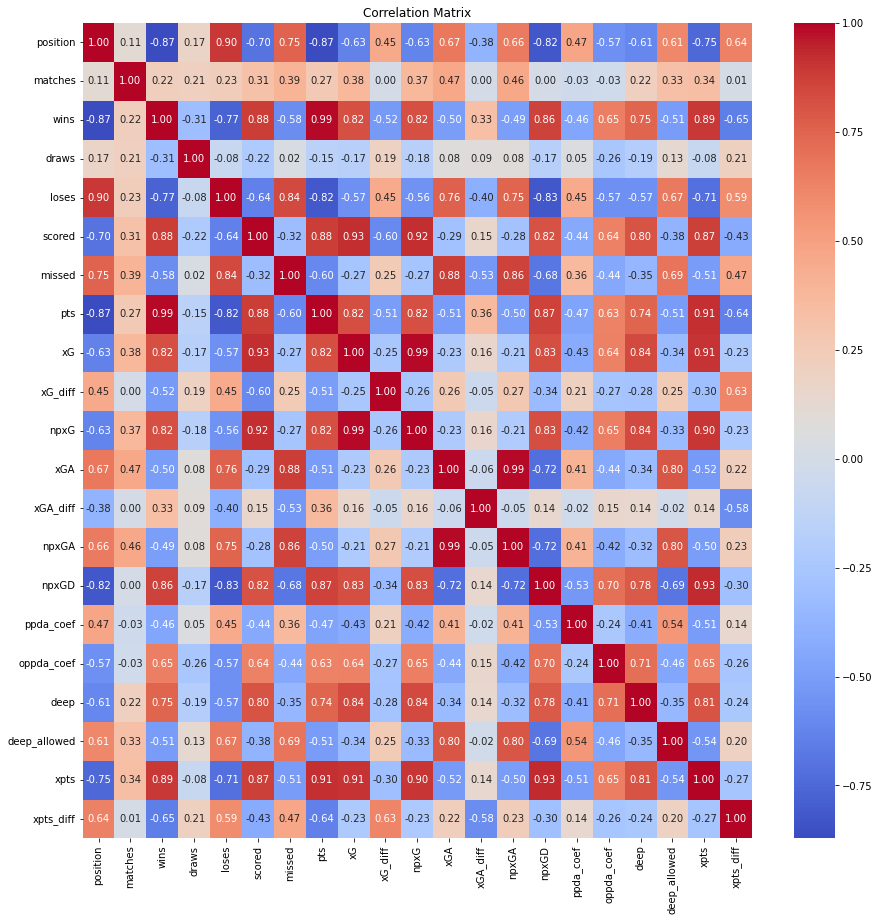

In [52]:
numerical_data_overview = raw_data_overview.select_dtypes(include=['number'])
correlation_matrix_overview = numerical_data_overview.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix_overview, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

####Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

#### Xác định các cặp dữ liệu có độ tương quan cao hơn 0.8

In [53]:
threshold = 0.8

highly_correlated = []
for i in range(len(correlation_matrix_overview.columns)):
    for j in range(i + 1, len(correlation_matrix_overview.columns)):
        if abs(correlation_matrix_overview.iloc[i, j]) > threshold:
            colname1 = correlation_matrix_overview.columns[i]
            colname2 = correlation_matrix_overview.columns[j]
            highly_correlated.append((colname1, colname2))

print("Các cặp dữ liệu có độ tương quan cao:", highly_correlated)

Các cặp dữ liệu có độ tương quan cao: [('position', 'wins'), ('position', 'loses'), ('position', 'pts'), ('position', 'npxGD'), ('wins', 'scored'), ('wins', 'pts'), ('wins', 'xG'), ('wins', 'npxG'), ('wins', 'npxGD'), ('wins', 'xpts'), ('loses', 'missed'), ('loses', 'pts'), ('loses', 'npxGD'), ('scored', 'pts'), ('scored', 'xG'), ('scored', 'npxG'), ('scored', 'npxGD'), ('scored', 'deep'), ('scored', 'xpts'), ('missed', 'xGA'), ('missed', 'npxGA'), ('pts', 'xG'), ('pts', 'npxG'), ('pts', 'npxGD'), ('pts', 'xpts'), ('xG', 'npxG'), ('xG', 'npxGD'), ('xG', 'deep'), ('xG', 'xpts'), ('npxG', 'npxGD'), ('npxG', 'deep'), ('npxG', 'xpts'), ('xGA', 'npxGA'), ('npxGA', 'deep_allowed'), ('npxGD', 'xpts'), ('deep', 'xpts')]


**Giải thích**

*   position ↔ wins: Vị trí của đội trong bảng xếp hạng có tương quan cao với số trận thắng. Đội thắng nhiều thường xếp ở vị trí cao.
- position ↔ loses: Vị trí của đội có tương quan nghịch với số trận thua. Đội thua nhiều thường xếp ở vị trí thấp.

- position ↔ pts: Vị trí có liên hệ chặt chẽ với số điểm (pts), vì điểm số quyết định thứ hạng của đội.

- position ↔ npxGD: Hiệu số bàn thắng kỳ vọng không tính phạt đền (npxGD) thường cao đối với các đội xếp vị trí cao.

- wins ↔ scored: Đội ghi nhiều bàn thắng hơn thường giành được nhiều chiến thắng hơn.

- wins ↔ pts: Mỗi trận thắng mang lại 3 điểm, nên số trận thắng có liên hệ trực tiếp với điểm số.

- wins ↔ xG / npxG: Số trận thắng cao thường đi đôi với chỉ số bàn thắng kỳ vọng lớn, vì các đội chơi hiệu quả thường tạo nhiều cơ hội.

- wins ↔ npxGD: Hiệu số bàn thắng kỳ vọng cao thường dẫn đến nhiều chiến thắng hơn.

- wins ↔ xpts: Điểm kỳ vọng (xpts) cũng phản ánh khả năng thắng trận của đội.

- loses ↔ missed: Số trận thua cao thường đi kèm với số bàn thua thực tế lớn.

- loses ↔ pts: Số trận thua nhiều thường dẫn đến điểm số thấp.

- loses ↔ npxGD: Đội có hiệu số bàn thắng kỳ vọng thấp thường thua nhiều trận hơn.

- scored ↔ pts: Đội ghi được nhiều bàn thắng hơn thường có số điểm cao hơn.

- scored ↔ xG / npxG: Số bàn thắng ghi được thường phản ánh năng lực tấn công dựa trên bàn thắng kỳ vọng.

- scored ↔ npxGD: Ghi nhiều bàn hơn giúp cải thiện hiệu số bàn thắng kỳ vọng.

- scored ↔ deep: Số pha tấn công sâu thường dẫn đến số bàn thắng cao hơn.

- scored ↔ xpts: Điểm kỳ vọng (xpts) cũng phản ánh khả năng ghi bàn và hiệu suất thi đấu.

- missed ↔ xGA / npxGA: Số bàn thua thực tế thường liên quan chặt chẽ đến bàn thua kỳ vọng.

- missed ↔ deep_allowed: Các đội bị tấn công sâu nhiều hơn thường để thủng lưới nhiều hơn.

- xG ↔ npxG: Bàn thắng kỳ vọng (xG) thường liên quan trực tiếp đến bàn thắng kỳ vọng không tính phạt đền (npxG).

- xG ↔ npxGD: Bàn thắng kỳ vọng ảnh hưởng đến hiệu số bàn thắng kỳ vọng.

- xG ↔ deep / xpts: Cơ hội tấn công sâu và điểm kỳ vọng thường tăng cùng với bàn thắng kỳ vọng.

- npxG ↔ npxGD / deep / xpts: Các chỉ số không tính phạt đền có liên hệ chặt chẽ với hiệu suất chung của đội.

- npxGA ↔ deep_allowed: Bàn thua kỳ vọng không tính phạt đền tăng lên khi đội bị đối thủ tấn công sâu nhiều hơn.

- npxGD ↔ xpts: Hiệu số bàn thắng kỳ vọng phản ánh khả năng đạt được điểm số kỳ vọng.

- deep ↔ xpts: Đội tạo ra nhiều pha tấn công sâu thường đạt điểm số kỳ vọng cao hơn.


Dù cho chúng có độ tương quan khá cao và nhiều, **tuy nhiên ta xem xét tính khả thi giữa các cột và thấy rằng những mối tương quan cao giữa các cột không phải là lý do đủ mạnh để loại bỏ chúng**, vì:
* Các cột trong dữ liệu không chỉ là số liệu, mà còn mang ý nghĩa chiến thuật, hiệu suất, và kết quả cụ thể trong bóng đá.
* Mỗi cột đại diện cho một khía cạnh khác nhau của hiệu suất đội bóng, dù có tương quan với nhau. Loại bỏ cột có thể làm mất đi thông tin quan trọng và làm méo mó kết quả phân tích.
* Mối quan hệ giữa các biến (dù tương quan cao) thường giúp khám phá các đặc điểm ẩn, xác nhận mô hình, hoặc kiểm tra giả thuyết.
* Cặp tương quan không đồng nghĩa với dư thừa. Ví dụ: position ↔ wins, loses, pts, npxGD. position (thứ hạng) là tổng hợp nhiều yếu tố như điểm số (pts), số trận thắng (wins), số trận thua (loses), và hiệu số kỳ vọng (npxGD). Dù position liên quan chặt chẽ với các biến khác, nó là biến kết quả cuối cùng thường được dùng làm mục tiêu phân tích. Các yếu tố như wins hay pts có thể thay đổi mạnh giữa các đội bóng có cùng thứ hạng (ví dụ: đội A và đội B cùng hạng 3 nhưng hiệu số bàn thắng khác nhau).

## C. Chuẩn hóa dữ liệu


Trong bộ dữ liệu này, ta **không cần thực hiện scaling** vì những lý do sau:
* Nếu chỉ muốn phân tích thống kê, tìm hiểu tương quan hoặc trực quan hóa dữ liệu, thì giữ nguyên thang đo thực tế sẽ giúp duy trì ý nghĩa ngữ cảnh.
* Các đặc trưng như pts, xG, xGA, wins đều mang ý nghĩa thực tế trong bóng đá. Giá trị của chúng thể hiện trực tiếp hiệu suất của đội bóng và không cần phải chuẩn hóa để so sánh giữa các đội. Ví dụ: Số điểm (pts) thường dao động từ 0–100, trong khi số bàn thắng kỳ vọng (xG) có thể chỉ từ 0–3 trong một trận. Tuy nhiên, sự khác biệt về thang đo này không gây cản trở cho việc hiểu dữ liệu trong ngữ cảnh bóng đá.
* Nếu thực hiện scaling, giá trị sau khi chuẩn hóa sẽ mất đi ý nghĩa thực tế. Ví dụ:
pts = 90 (số điểm thực tế) → Nếu được chuẩn hóa thành 0.9 (dưới Min-Max Scaling), ý nghĩa trực tiếp sẽ bị mất, khó hiểu hơn.
* Các đồ thị như histogram, scatter plot hay box plot thường trực tiếp phản ánh giá trị thực tế của các đặc trưng. Scaling có thể làm biến đổi dữ liệu, khiến kết quả trực quan hóa khó hiểu hoặc không phù hợp với ngữ cảnh.
* Dữ liệu rời rạc hoặc tự nhiên, không bị chi phối bởi độ lớn giữa các cột.


##D. Lưu dữ liệu

In [54]:
raw_data_overview.to_csv('data/understat.com_preprocess.csv', index=False)

# TIỀN XỬ LÝ DỮ LIỆU TỪ FILE understat_per_game.csv


Đây là dữ liệu chi tiết theo từng trận đấu của một đội bóng, trong đó mỗi hàng đại diện cho một trận cụ thể.

## A. LÀM SẠCH DỮ LIỆU

### A.1. Khám phá dữ liệu

#### Đọc dữ liệu từ raw_data

Đầu tiên, ta đọc 'understat_per_game.csv' để lưu trữ vào biến raw_data_details

In [55]:
raw_data_details = pd.read_csv('data/understat_per_game.csv')
raw_data_details

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,...,15.500000,310,20,19.600000,294,15,Lecce,-0.551846,-0.412350,0.1597
24576,Serie_A,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,...,12.650000,253,20,14.600000,292,20,Lecce,0.699320,-1.553321,2.4418
24577,Serie_A,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,...,13.777778,248,18,12.888889,348,27,Lecce,-0.464890,-0.040900,-0.5675
24578,Serie_A,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,...,25.454545,280,11,10.600000,212,20,Lecce,0.247360,-0.310730,1.1019


#### Dữ liệu có bao nhiêu hàng, bao nhiêu cột?


Tiếp theo, chúng ta tính toán số lượng dòng và cột và lưu vào biến 'num_cols_details' và 'num_rows_details'

In [56]:
num_rows_details, num_cols_details =raw_data_details.shape
print(f'Số dòng: {num_rows_details}')
print(f'Số cột: {num_cols_details}')

Số dòng: 24580
Số cột: 29


#### Ý nghĩa của các dòng dữ liệu


Mỗi dòng đại diện cho một trận đấu cụ thể của một đội bóng trong mùa giải. Dòng dữ liệu cung cấp thông tin chi tiết về trận đấu, bao gồm ngày thi đấu, kết quả, chỉ số kỳ vọng, và các thông số liên quan đến pressing hoặc số điểm kỳ vọng.

#### Dữ liệu các dòng có bị lặp không?

Tiếp theo, tính toán số lượng dòng có lặp không và lưu vào biến 'duplicated_rows_overview'

In [57]:
duplicated_rows_details = raw_data_details[raw_data_details.duplicated()]
if duplicated_rows_details.empty:
    print("Không có dòng bị lặp trong dữ liệu.")
else:
    print("Có dòng bị lặp trong dữ liệu.")

Không có dòng bị lặp trong dữ liệu.


Như vậy, giữa mỗi dòng không có dự liệu nào bị lặp

#### Ý nghĩa của các cột dữ liệu

- league: Tên giải đấu.

- year: Năm diễn ra mùa giải.

- h_a: Trận đấu diễn ra trên sân nhà (h) hay sân khách (a).

- xG: Bàn thắng kỳ vọng trong trận đấu.

- xGA: Bàn thua kỳ vọng trong trận đấu.

- npxG: Bàn thắng kỳ vọng không tính phạt đền và phản lưới nhà trong trận.

- npxGA: Bàn thua kỳ vọng không tính phạt đền và phản lưới nhà trong trận.

- deep: Số pha tấn công sâu trong trận.

- deep_allowed: Số pha tấn công sâu mà đội phải chống lại trong trận.

- scored: Số bàn thắng thực tế trong trận.

- missed: Số bàn thua thực tế trong trận.

- xpts: Số điểm kỳ vọng từ trận đấu.

- result: Kết quả trận đấu (thắng, hòa, thua: w-l-)

- date: Ngày và giờ diễn ra trận đấu.

- wins: kết quả trận đấu: 1 nếu thắng

- draws: kết quả trận đấu: 1 nếu hòa

- loses: kết quả trận đấu: 1 nếu thua

- pts: Tổng số điểm tính đến thời điểm này.

- npxGD: Hiệu số bàn thắng kỳ vọng không tính phạt đền (npxG - npxGA) trong trận.

- ppda_coef: Chỉ số PPDA trong trận.

- ppda_att: Tổng số đường chuyền của đối thủ trong các hành động pressing.

- ppda_def: Tổng số hành động pressing của đội.

- oppda_coef: Chỉ số pressing của đối thủ trong trận.

- oppda_att: Tổng số đường chuyền của đội bị pressing bởi đối thủ.

- oppda_def: Tổng số hành động pressing của đối thủ.

- team: Tên đội bóng.

- xG_diff: Hiệu số bàn thắng kỳ vọng so với thực tế trong trận.

- xGA_diff: Hiệu số bàn thua kỳ vọng so với thực tế trong trận.

- xpts_diff: Chênh lệch số điểm kỳ vọng so với thực tế trong trận.

#### Kiểu dữ liệu của từng cột

In [58]:
raw_data_details.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

#### Chuẩn hóa kiểu dữ liệu nếu chưa phù hợp

Nhận thấy rằng:
* 'year' có kiểu dữ liệu số, tuy nhiên nó thể hiện thời gian thay vì một số. Do đó, ta sẽ chuyển đổi nó thành kiểu Object để thể hiện rõ ràng hơn

* 'date' là kiểu dữ liệu thể hiển ngày giờ, chính về thế ta sẽ chuẩn hóa nó về dạng datetime

* 'wins', 'draws', 'loses' thể hiện 0, 1, do đó ta sẽ chuẩn hóa về Boolen


In [59]:
# Chuyển đổi 'year' thành kiểu object
raw_data_details['year'] = raw_data_details['year'].astype('object')

# Chuyển đổi 'date' thành kiểu datetime
raw_data_details['date'] = pd.to_datetime(raw_data_details['date'])

# Chuyển đổi 'wins', 'draws', 'losses' thành kiểu boolean
raw_data_details['wins'] = raw_data_details['wins'].astype(bool)
raw_data_details['draws'] = raw_data_details['draws'].astype(bool)
raw_data_details['loses'] = raw_data_details['loses'].astype(bool)

In [60]:
raw_data_details.dtypes

league                  object
year                    object
h_a                     object
xG                     float64
xGA                    float64
npxG                   float64
npxGA                  float64
deep                     int64
deep_allowed             int64
scored                   int64
missed                   int64
xpts                   float64
result                  object
date            datetime64[ns]
wins                      bool
draws                     bool
loses                     bool
pts                      int64
npxGD                  float64
ppda_coef              float64
ppda_att                 int64
ppda_def                 int64
oppda_coef             float64
oppda_att                int64
oppda_def                int64
team                    object
xG_diff                float64
xGA_diff               float64
xpts_diff              float64
dtype: object

#### Với các cột dữ liệu không phải dạng số, các giá trị được phân bổ như thế nào

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [61]:
def categorical_analysis(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(exclude=['number']).columns
    analysis_results = []

    for col in cat_cols:
        missing_ratio = round(df[col].isna().sum() / df.shape[0] * 100, 1)
        num_values = df[col].nunique()
        value_counts = df[col].value_counts(normalize=True)
        value_ratios = {val: round(perc * 100, 1) for val, perc in value_counts.items()}

        analysis_results.append({
            'column': col,
            'missing_ratio': missing_ratio,
            'num_values': num_values,
            'value_ratios': value_ratios,
        })

    return pd.DataFrame(analysis_results)

cat_col_info_details = categorical_analysis(raw_data_details)
cat_col_info_details

,column,missing_ratio,num_values,value_ratios
0,league,0.0,6,"{'EPL': 18.6, 'La_liga': 18.6, 'Serie_A': 18.5..."
1,year,0.0,6,"{2014: 16.8, 2015: 16.8, 2016: 16.8, 2017: 16...."
2,h_a,0.0,2,"{'h': 50.0, 'a': 50.0}"
3,result,0.0,3,"{'w': 37.4, 'l': 37.4, 'd': 25.2}"
4,date,0.0,6632,"{2019-05-12 14:00:00: 0.1, 2016-04-20 22:45:00..."
5,wins,0.0,2,"{False: 62.6, True: 37.4}"
6,draws,0.0,2,"{False: 74.8, True: 25.2}"
7,loses,0.0,2,"{False: 62.6, True: 37.4}"
8,team,0.0,168,"{'Real Sociedad': 0.9, 'Southampton': 0.9, 'Ma..."


#### Với các cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào

Đối với các cột dữ liệu số, ta tính toán
* Tỉ lệ các giá trị bị thiếu
* Giá trị nhỏ nhất
* Giá trị lớn nhất
* Trung bình
* Các Q1(25%), Q3(75%)

Sau đó lưu vào DataFrame num_col_info, trong đó:
* Tên các cột là cột có kiểu dữ liệu số
* Tên các dòng là missing_ratio, min, lower_quartile, median, upper_quartile, max

In [62]:
def missing_ratio(s: pd.Series) -> float:
    return round(s.isna().sum() / s.shape[0] * 100, 1)

def lower_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.25), 1)

def median(s: pd.Series) -> float:
    return round(s.median(), 1)

def upper_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.75), 1)

num_col_info_details = raw_data_details.select_dtypes(include='number').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(1)
num_col_info_details

,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.9,-5.9,-3.0
lower_quartile,0.7,0.7,0.6,0.6,3.0,3.0,0.0,0.0,0.7,0.0,-0.7,7.0,179.0,19.0,7.0,179.0,19.0,-0.6,-0.6,-0.7
median,1.2,1.2,1.0,1.0,5.0,5.0,1.0,1.0,1.3,1.0,0.0,9.5,231.0,24.0,9.5,231.0,24.0,0.1,0.1,0.1
upper_quartile,1.8,1.8,1.6,1.6,8.0,8.0,2.0,2.0,2.1,3.0,0.7,13.1,290.0,29.0,13.1,290.0,29.0,0.6,0.6,0.7
max,6.6,6.6,6.6,6.6,42.0,42.0,10.0,10.0,3.0,3.0,6.0,152.0,764.0,65.0,152.0,764.0,65.0,5.1,5.1,2.9


### A.2.Xử lý dữ liệu thiếu


#### Thống kế tỉ lệ dữ liệu bị thiếu

In [63]:
dict(num_col_info_details.iloc[0])

{'xG': 0.0,
 'xGA': 0.0,
 'npxG': 0.0,
 'npxGA': 0.0,
 'deep': 0.0,
 'deep_allowed': 0.0,
 'scored': 0.0,
 'missed': 0.0,
 'xpts': 0.0,
 'pts': 0.0,
 'npxGD': 0.0,
 'ppda_coef': 0.0,
 'ppda_att': 0.0,
 'ppda_def': 0.0,
 'oppda_coef': 0.0,
 'oppda_att': 0.0,
 'oppda_def': 0.0,
 'xG_diff': 0.0,
 'xGA_diff': 0.0,
 'xpts_diff': 0.0}

Sau khi thống kê dữ liệu, chúng ta thấy rằng nếu các dữ liệu có tỉ lệ thiếu quá nhiều sẽ dẫn đến thiếu nhiều và không sử dụng được nhiều, nên ta có thể xóa nó

Nếu dữ liệu bị thiếu lớn hơn 75%, ta sẽ xóa cột đó và cập nhật lại Dataframe

#### Xóa cột có tỉ lệ thiếu trên 75%

In [64]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_overview.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    copy = df.copy()
    cols = []
    for key, value in missing_lst.items():
        if value > threshold:
            cols.append(key)
    if len(cols) > 0:
        copy.drop(cols, axis=1, inplace=True)
        print(f"Xóa cột: {cols}")
    else:
        print("Không xóa cột nào")
    return copy

raw_data_details = drop_missing_features(raw_data_details, dict(num_col_info_details.iloc[0]))

Không xóa cột nào


Ta thấy rằng, sau khi check, không có cột nào bị thiếu dữ liệu

### A.3. Xử lý dữ liệu bị nhiều bằng dùng IQR

Phương pháp IQR (Interquartile Range) là một cách phổ biến để xử lý dữ liệu bị nhiễu bằng cách loại bỏ các giá trị nằm ngoài khoảng từ
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR đến
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR. Tuy nhiên, phương pháp này có những hạn chế khi áp dụng cho dữ liệu trong file này do:
* Phương pháp IQR giả định rằng dữ liệu có sự phân bố ổn định, nhưng trong dữ liệu bóng đá, các chỉ số như bàn thắng kỳ vọng (xG), bàn thua kỳ vọng (xGA) hay số điểm thường không tuân theo phân phối chuẩn.
*   Những giá trị "ngoại lệ" trong dữ liệu không nhất thiết là lỗi, mà có thể là: một đội bóng có hiệu suất vượt trội (ghi nhiều bàn hơn bình thường, như 8 bàn trong một trận).
Một trận đấu hiếm hoi với kết quả không thường thấy (ví dụ: 7–2).
Trong bóng đá, các trường hợp bất thường này là phần tự nhiên của dữ liệu và không nên được loại bỏ hoặc điều chỉnh.
* Một đội bóng ghi nhiều bàn hơn dự kiến (xG vượt xa giá trị thực tế) hoặc để thua ít hơn kỳ vọng có thể phản ánh chiến thuật hoặc phong độ đặc biệt. Đây không phải là nhiễu mà là đặc điểm cần giữ lại để phân tích.
* Trận đấu với xG cao có thể là do đối thủ yếu hoặc lối chơi tấn công mạnh mẽ.
* Một đội có nhiều điểm vượt xa kỳ vọng (xpts) có thể nhờ vào yếu tố may mắn hoặc chiến thuật hợp lý.
* Một trận đấu có chỉ số kỳ vọng cao bất thường (ví dụ: xG = 5.0) có thể là do một chiến thắng áp đảo. Loại bỏ các trận như vậy sẽ làm mất thông tin về xu hướng hoặc khả năng bùng nổ của đội.

**Loại bỏ dữ liệu như vậy sẽ làm mất thông tin quan trọng về các đội hoặc trận đấu có hiệu suất đặc biệt. Các yếu tố ngữ cảnh này không thể hiện qua IQR và việc loại bỏ "nhiễu" sẽ làm giảm độ chính xác của phân tích.**

## B. Giảm chiều dữ liệu

#### Vẽ correlation matrix

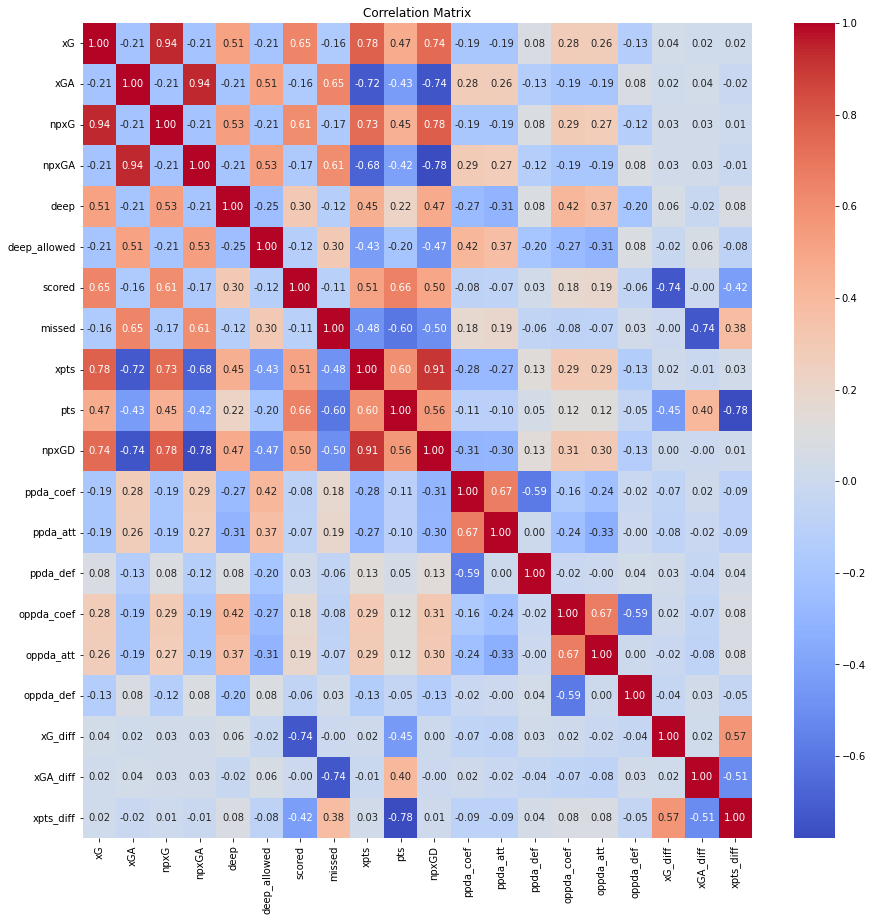

In [65]:
numerical_data_details = raw_data_details.select_dtypes(include=['number'])

correlation_matrix_details = numerical_data_details.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix_details, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

####Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

#### Xác định các cặp dữ liệu có độ tương quan cao hơn 0.8

In [66]:
threshold = 0.8

highly_correlated = []
for i in range(len(correlation_matrix_details.columns)):
    for j in range(i + 1, len(correlation_matrix_details.columns)):
        if abs(correlation_matrix_details.iloc[i, j]) > threshold:
            colname1 = correlation_matrix_details.columns[i]
            colname2 = correlation_matrix_details.columns[j]
            highly_correlated.append((colname1, colname2))

print("Các cặp dữ liệu có độ tương quan cao:", highly_correlated)

Các cặp dữ liệu có độ tương quan cao: [('xG', 'npxG'), ('xGA', 'npxGA'), ('xpts', 'npxGD')]


**Giải thích**.

- xG ↔ npxG: Bàn thắng kỳ vọng (xG) thường liên quan trực tiếp đến bàn thắng kỳ vọng không tính phạt đền (npxG).

- xG ↔ npxGD: Bàn thắng kỳ vọng ảnh hưởng đến hiệu số bàn thắng kỳ vọng.


Tuy nhiên, ta chọn không xóa cột nào. Việc không xóa các cặp dữ liệu có độ tương quan cao như ('xG', 'npxG'), ('xGA', 'npxGA'), và ('xpts', 'npxGD') dù chúng có độ tương quan cao là do chúng mang ý nghĩa ngữ cảnh riêng và giá trị thực tế trong dữ liệu bóng đá như sau:
* Độ tương quan cao giữa xG và npxG là do penalty thường chiếm tỷ lệ nhỏ trong tổng số bàn thắng, nhưng chúng không hoàn toàn giống nhau. Trong một số phân tích, ta cần biết hiệu suất ghi bàn tổng thể (xG) hoặc hiệu suất không bao gồm yếu tố ngoại lệ như penalty (npxG). Cả hai đều mang giá trị phân tích quan trọng.
* Tương tự như trên, mặc dù xGA và npxGA tương quan cao, chúng đại diện cho các khía cạnh phòng thủ khác nhau.
* xpts thường được dùng để so sánh kết quả kỳ vọng với kết quả thực tế (đánh giá hiệu suất tổng thể), trong khi npxGD cung cấp chi tiết về khả năng tấn công và phòng thủ không liên quan đến penalty. Nên ta cũng chọn không xóa
* Các chỉ số như xG, npxG, xpts không chỉ là con số mà còn chứa đựng ngữ cảnh chiến thuật và cách đội bóng thi đấu. Xóa một trong số đó sẽ làm mất đi một phần quan trọng của câu chuyện.



Ở đây, ta nhận ra là Result-Wins-Draws-Loses đang bị trùng màu dữ liệu: khi Result là 'w', thì wins sẽ cho biến 1, draws và loses sẽ là biến 0; tương tự cho 'd' và 'l'

Song song đó, cột Date cũng không còn quan trọng do mục tiêu chính là phân tích hiệu suất của đội bóng, trận bóng qua đó dự đoán kết quả, và data đã có'Season' nên Data là không cần rhieets

=> Ta tiến hành xóa 3 cột Wins, Draws, Loses và cột Date giúp giảm chiều dữ liệu.

In [67]:
raw_data_details.drop(columns=['wins', 'draws', 'loses'], inplace=True)

print(raw_data_details.shape)
raw_data_details.head()

(24580, 26)


,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


## C. Chuẩn hóa dữ liệu


Ta cũng sẽ **không thực hiện việc scaling** cho data này vì những lý do sau:
* Các giá trị này có thang đo tự nhiên, phản ánh hiệu suất thực tế trong ngữ cảnh bóng đá: Ví dụ: xG có thể dao động từ 0 đến khoảng 5, còn pts chỉ có các giá trị rời rạc (0, 1, hoặc 3). Thang đo khác biệt giữa các cột không ảnh hưởng đến việc hiểu dữ liệu, vì chúng đều đại diện cho các khía cạnh cụ thể và có ý nghĩa riêng.
* Nếu thực hiện scaling, các giá trị sẽ mất ý nghĩa trực tiếp: scored = 2 (2 bàn thắng) → Sau scaling, giá trị có thể trở thành 0.4, làm giảm tính trực quan và khó hiểu trong phân tích.
* Khi tính các thống kê như trung bình, phương sai, hoặc tương quan, việc giữ nguyên giá trị gốc sẽ giúp bạn dễ dàng đưa ra các nhận xét dựa trên thực tế: trung bình số bàn thắng (scored) là 1.5 → Giá trị này có ý nghĩa rõ ràng hơn là một số sau khi chuẩn hóa, chẳng hạn 0.38.
* Các đồ thị như histogram, scatter plot hay box plot thường trực tiếp phản ánh giá trị thực tế của các đặc trưng. Scaling có thể làm biến đổi dữ liệu, khiến kết quả trực quan hóa khó hiểu hoặc không phù hợp với ngữ cảnh.
* Dữ liệu rời rạc hoặc tự nhiên, không bị chi phối bởi độ lớn giữa các cột.

##D. Lưu dữ liệu

In [68]:
raw_data_details.to_csv('data/understat_per_game_preprocess.csv', index=False)